## **Read Dataset**

In [ ]:
# read the tfl bus  safety dataset
import pandas as pd
# Read the dataset from the URL
url = "tfl_bus_safety.csv"
df = pd.read_csv(url)
# Print the first few rows of the dataset
df.head()

year date_of_incident route        operator  group_name  \
0  2015         1/1/2015     1  London General    Go-Ahead   
1  2015         1/1/2015     4       Metroline   Metroline   
2  2015         1/1/2015     5     East London  Stagecoach   
3  2015         1/1/2015     5     East London  Stagecoach   
4  2015         1/1/2015     6       Metroline   Metroline   

             bus_garage              borough  \
0  Garage Not Available            Southwark   
1  Garage Not Available            Islington   
2  Garage Not Available             Havering   
3  Garage Not Available  None London Borough   
4  Garage Not Available          Westminster   

                           injury_result_description incident_event_type  \
0                          Injuries treated on scene    Onboard Injuries   
1                          Injuries treated on scene    Onboard Injuries   
2  Taken to Hospital – Reported Serious Injury or...    Onboard Injuries   
3  Taken to Hospital – Reported Serious Injury or...    Onboard Injuries   
4        Reported Minor Injury - Treated at Hospital    Onboard Injuries   

  victim_category victims_sex victims_age  
0       Passenger        Male       Child  
1       Passenger        Male     Unknown  
2       Passenger        Male     Elderly  
3       Passenger        Male     Elderly  
4      Pedestrian      Female     Elderly

In [ ]:
# Print the information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23158 entries, 0 to 23157
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   year                       23158 non-null  int64 
 1   date_of_incident           23158 non-null  object
 2   route                      23158 non-null  object
 3   operator                   23158 non-null  object
 4   group_name                 23158 non-null  object
 5   bus_garage                 23158 non-null  object
 6   borough                    23158 non-null  object
 7   injury_result_description  23158 non-null  object
 8   incident_event_type        23158 non-null  object
 9   victim_category            23158 non-null  object
 10  victims_sex                23158 non-null  object
 11  victims_age                23158 non-null  object
dtypes: int64(1), object(11)
memory usage: 2.1+ MB


In [ ]:
# Print the summary statistics of the dataset
df.describe()

year
count  23158.000000
mean    2016.449607
std        1.074073
min     2015.000000
25%     2016.000000
50%     2016.000000
75%     2017.000000
max     2018.000000

## **Data Pre-Processing**

In [ ]:
# check the missing values in each variable
missing_values = df.isnull().sum()
print(missing_values)

year                         0
date_of_incident             0
route                        0
operator                     0
group_name                   0
bus_garage                   0
borough                      0
injury_result_description    0
incident_event_type          0
victim_category              0
victims_sex                  0
victims_age                  0
dtype: int64


The 'tfl_bus_safety' dataset has no missing values in any of its variables.
This means that all rows have complete information for every variable.
This is important for data analysis, as missing values can introduce bias and errors into the results.

In [ ]:
#check the duplicate in the dataset]
duplicate_rows = df[df.duplicated()]
# Print the number of duplicate rows
print(f"Number of duplicate rows: {len(duplicate_rows)}")
# Print the first few rows of the duplicate rows
duplicate_rows.head()

Number of duplicate rows: 1694


year date_of_incident route             operator     group_name  \
11  2015         1/1/2015    11       London General       Go-Ahead   
28  2015         1/1/2015    22       London General       Go-Ahead   
29  2015         1/1/2015    22       London General       Go-Ahead   
60  2015         1/1/2015    38  Arriva London North  Arriva London   
61  2015         1/1/2015    38  Arriva London North  Arriva London   

              bus_garage               borough  injury_result_description  \
11  Garage Not Available           Westminster  Injuries treated on scene   
28  Garage Not Available  Hammersmith & Fulham  Injuries treated on scene   
29  Garage Not Available  Hammersmith & Fulham  Injuries treated on scene   
60  Garage Not Available               Hackney  Injuries treated on scene   
61  Garage Not Available               Hackney  Injuries treated on scene   

   incident_event_type victim_category victims_sex victims_age  
11    Onboard Injuries       Passenger      Female       Adult  
28    Onboard Injuries       Passenger     Unknown     Unknown  
29    Onboard Injuries       Passenger     Unknown     Unknown  
60    Onboard Injuries       Passenger     Unknown     Unknown  
61    Onboard Injuries       Passenger     Unknown     Unknown

In [ ]:
# Remove the duplicate rows from the dataset
df.drop_duplicates(inplace=True)

In [ ]:
#check the duplicate in the dataset]
duplicate_rows = df[df.duplicated()]
# Print the number of duplicate rows
print(f"Number of duplicate rows: {len(duplicate_rows)}")

Number of duplicate rows: 0


## **Data Cleaning**

**Prepare the Route Variable**

In [ ]:
# Filter the DataFrame for '(blank)' value in route variable
route_df = df[df['route'] == '(blank)']
# Count the number of records
total_blanks = len(route_df)
# Print the result
print("Total records related to blank values in route variable:", total_blanks)

Total records related to blank values in route variable: 14


In [ ]:
# Replace '(blank)' with NaN in the 'route' column
df['route'].replace('(blank)', pd.NA, inplace=True)

In [ ]:
# Count missing values for each variable
missing_values = df.isnull().sum()
# Print the result
print(missing_values)


year                          0
date_of_incident              0
route                        14
operator                      0
group_name                    0
bus_garage                    0
borough                       0
injury_result_description     0
incident_event_type           0
victim_category               0
victims_sex                   0
victims_age                   0
dtype: int64


In [ ]:
# Calculate the mode of the 'route' column
mode_route = df['route'].mode()[0]
# Print the mode
print("Mode of 'route' column:", mode_route)
# Fill missing values in 'route' with the mode
df['route'].fillna(mode_route, inplace=True)

Mode of 'route' column: OOS


In [ ]:
# Verify that there are no more missing values in 'route'
missing_values_after = df['route'].isnull().sum()
print("Missing values in 'route' after filling:", missing_values_after)

Missing values in 'route' after filling: 0


**Explore Categories in all variables**

In [ ]:
print(df['operator'].value_counts())

operator
Metroline                3211
Arriva London North      2928
East London              2235
London United            2110
Selkent                  1687
London General           1593
Arriva London South      1565
London Central           1283
Metroline West           1127
Abellio London            903
Metrobus                  745
Tower Transit             706
Arriva The Shires         275
Blue Triangle Buses       252
London Sovereign          199
Quality Line              134
Abellio West              124
Arriva Kent Thameside     100
Docklands Buses            96
C T Plus                   76
TGM GROUP                  57
H R Richmond               54
Sullivan Buses              2
Uno Buses                   1
Sullivan Bus & Coach        1
Name: count, dtype: int64


In [ ]:
print(df['group_name'].value_counts())

group_name
Arriva London            4487
Metroline                4339
Go-Ahead                 3970
Stagecoach               3905
London United            2309
Abellio                  1027
Tower Transit             724
Arriva The Shires         276
Quality Line              188
Arriva Kent Thameside     100
CT Plus                    76
TGM                        59
Sullivan Buses              3
Uno Buses                   1
Name: count, dtype: int64


In [ ]:
print(df['bus_garage'].value_counts())

bus_garage
Garage Not Available    7733
Plumstead                528
Holloway                 408
Cricklewood              384
Tottenham                371
                        ... 
Kangley Bridge Road       12
Heathrow                   8
Edmonton                   5
South Mimms                2
Hatfield                   1
Name: count, Length: 84, dtype: int64


In [ ]:
print(df['injury_result_description'].value_counts())

injury_result_description
Injuries treated on scene                                          15933
Taken to Hospital – Reported Serious Injury or Severity Unknown     2830
Reported Minor Injury - Treated at Hospital                         2659
Fatal                                                                 42
Name: count, dtype: int64


In [ ]:
print(df['incident_event_type'].value_counts())

incident_event_type
Slip Trip Fall             6558
Onboard Injuries           5921
Personal Injury            4343
Collision Incident         3817
Assault                     574
Activity Incident Event     111
Vandalism Hooliganism        71
Safety Critical Failure      61
Fire                          5
Robbery                       3
Name: count, dtype: int64


In [ ]:
print(df['victims_sex'].value_counts())

victims_sex
Female     10939
Male        7410
Unknown     3115
Name: count, dtype: int64


In [ ]:
print(df['victims_age'].value_counts())

victims_age
Adult      9968
Unknown    6423
Elderly    2684
Child      2082
Youth       307
Name: count, dtype: int64


# **Exploratory Data Analysis (EDA)**

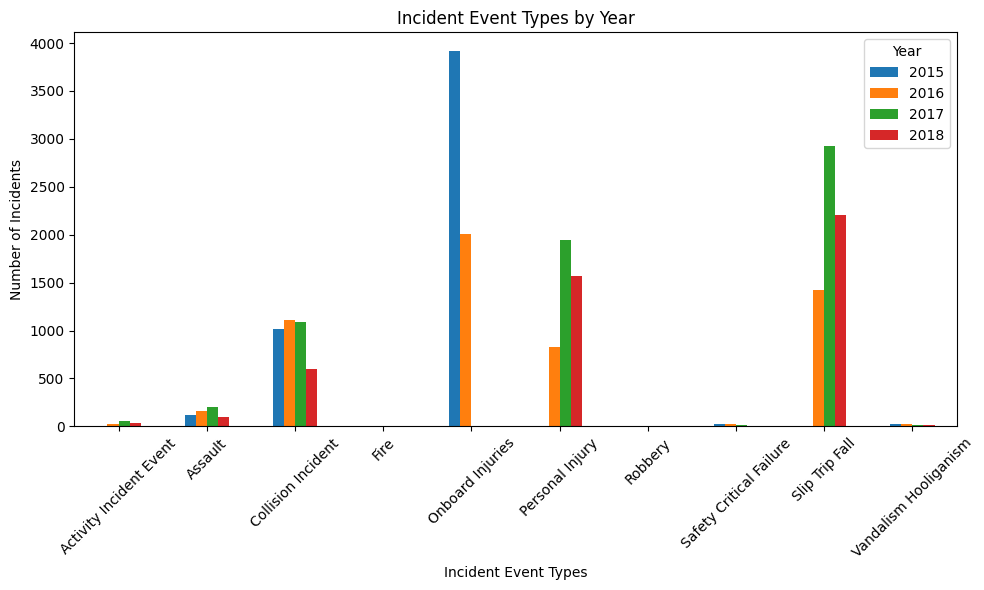

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group the data by year and incident event type, and count the occurrences
yearly_incidents = df.groupby(['incident_event_type', 'year'])['incident_event_type'].count().unstack()

# Plot the results
yearly_incidents.plot(kind='bar', figsize=(10, 6))
plt.title('Incident Event Types by Year')
plt.xlabel('Incident Event Types')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45)
plt.legend(title='Year')
plt.tight_layout()
plt.show()


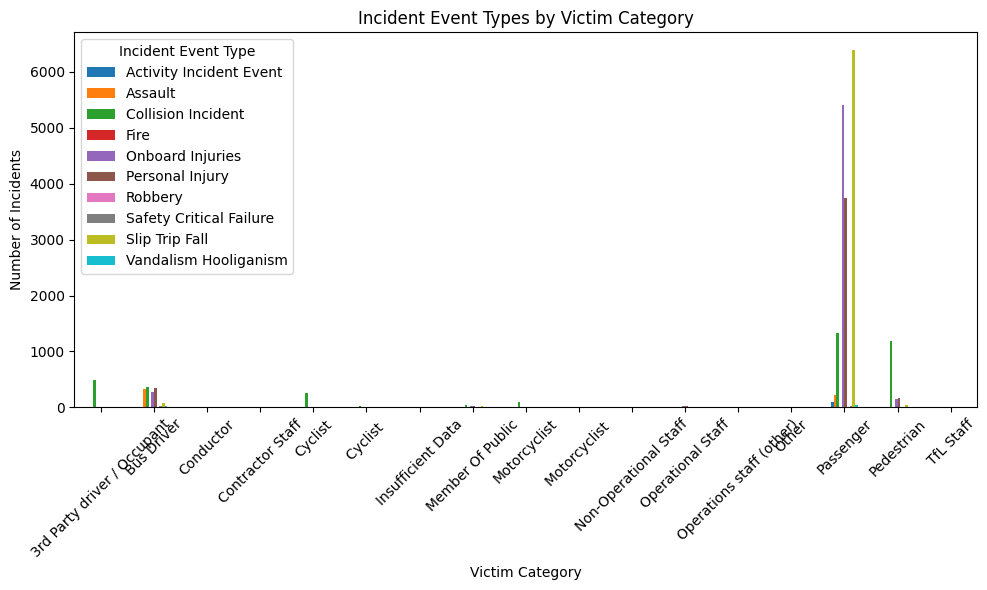

In [ ]:
# Incident Event Types by victim_category

# Group the data by victim_category and incident event type, and count the occurrences
victim_incidents = df.groupby(['victim_category', 'incident_event_type'])['incident_event_type'].count().unstack()

# Plot the results
victim_incidents.plot(kind='bar', figsize=(10, 6))
plt.title('Incident Event Types by Victim Category')
plt.xlabel('Victim Category')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45)
plt.legend(title='Incident Event Type')
plt.tight_layout()
plt.show()


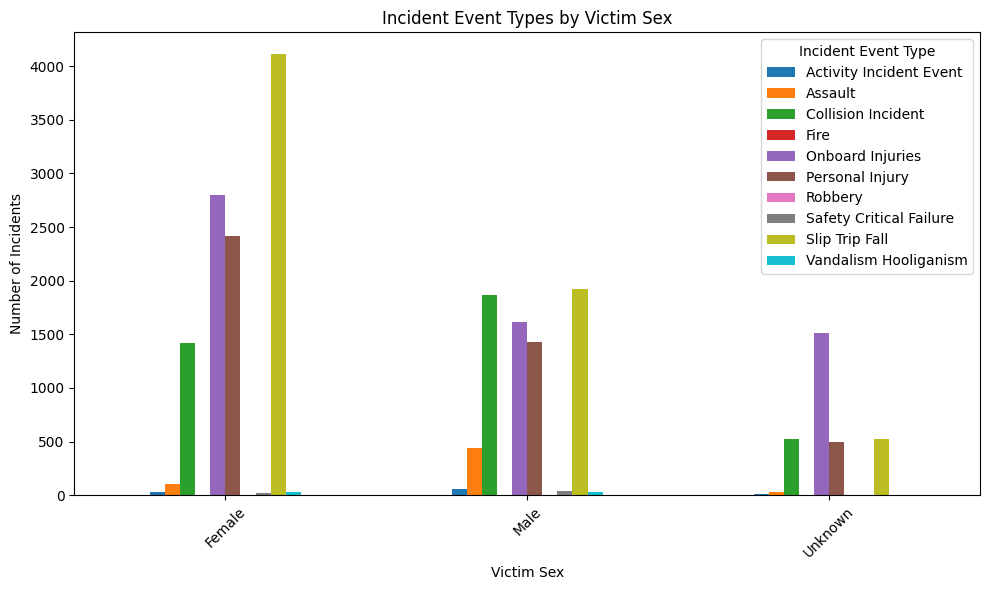

In [ ]:
# Incident Event Types by victims_sex

# Group the data by victims_sex and incident event type, and count the occurrences
sex_incidents = df.groupby(['victims_sex', 'incident_event_type'])['incident_event_type'].count().unstack()

# Plot the results
sex_incidents.plot(kind='bar', figsize=(10, 6))
plt.title('Incident Event Types by Victim Sex')
plt.xlabel('Victim Sex')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45)
plt.legend(title='Incident Event Type')
plt.tight_layout()
plt.show()


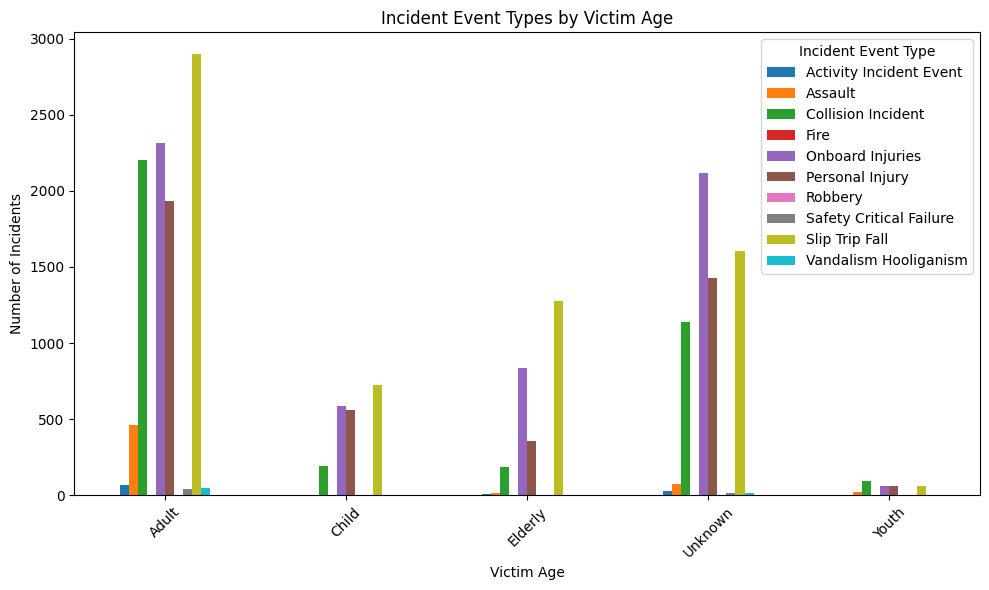

In [ ]:
# Incident Event Types by victims_age

# Group the data by victims_age and incident event type, and count the occurrences
age_incidents = df.groupby(['victims_age', 'incident_event_type'])['incident_event_type'].count().unstack()

# Plot the results
age_incidents.plot(kind='bar', figsize=(10, 6))
plt.title('Incident Event Types by Victim Age')
plt.xlabel('Victim Age')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45)
plt.legend(title='Incident Event Type')
plt.tight_layout()
plt.show()


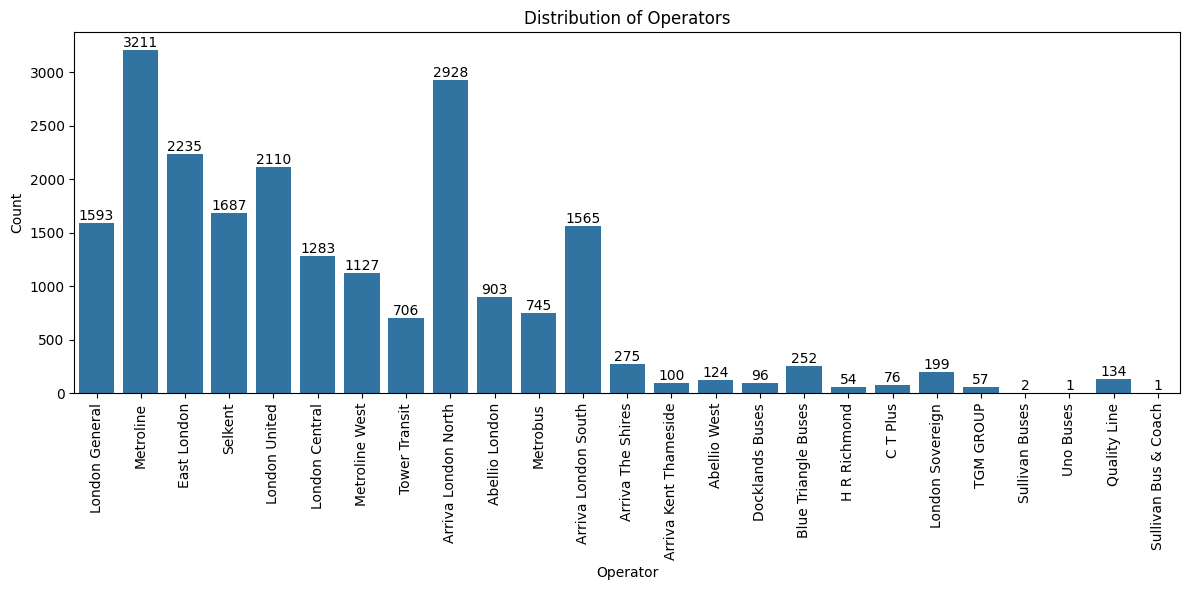

In [ ]:
# Plot the distribution of operators
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=df, x='operator', order=df['operator'].unique())
for i in ax.containers:
    ax.bar_label(i,)
plt.title('Distribution of Operators')
plt.xlabel('Operator')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


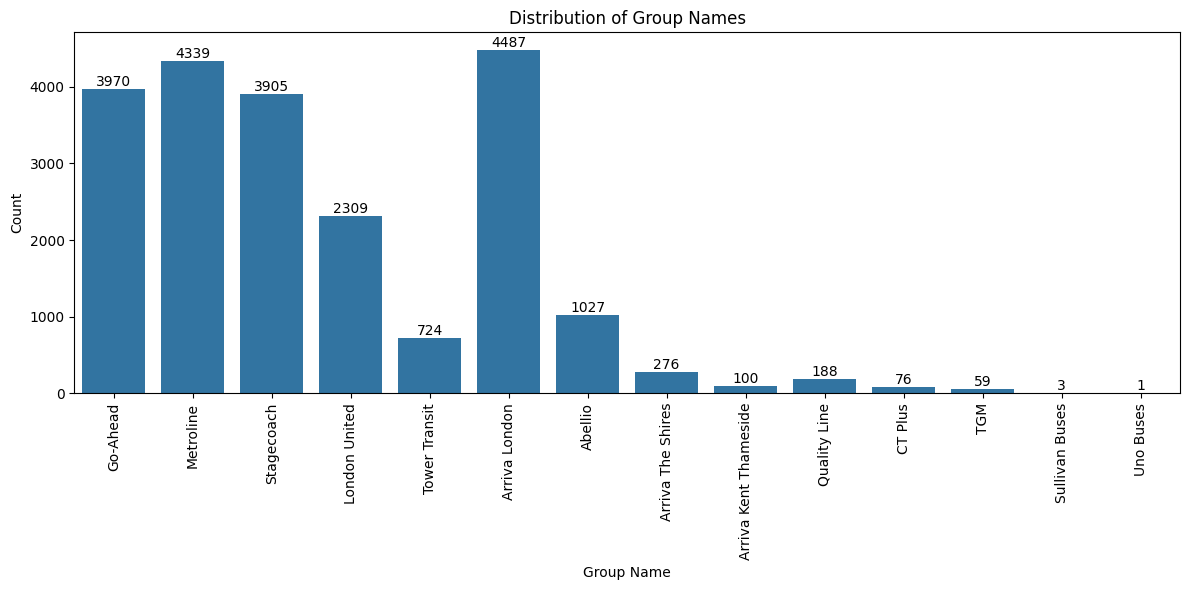

In [ ]:
# Plot the distribution of group_name
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=df, x='group_name', order=df['group_name'].unique())
for i in ax.containers:
    ax.bar_label(i,)
plt.title('Distribution of Group Names')
plt.xlabel('Group Name')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


<ipython-input-27-5e991d621270>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df[df['bus_garage'].isin(top_10_garages)], x='bus_garage', order=top_10_garages, palette='tab10')


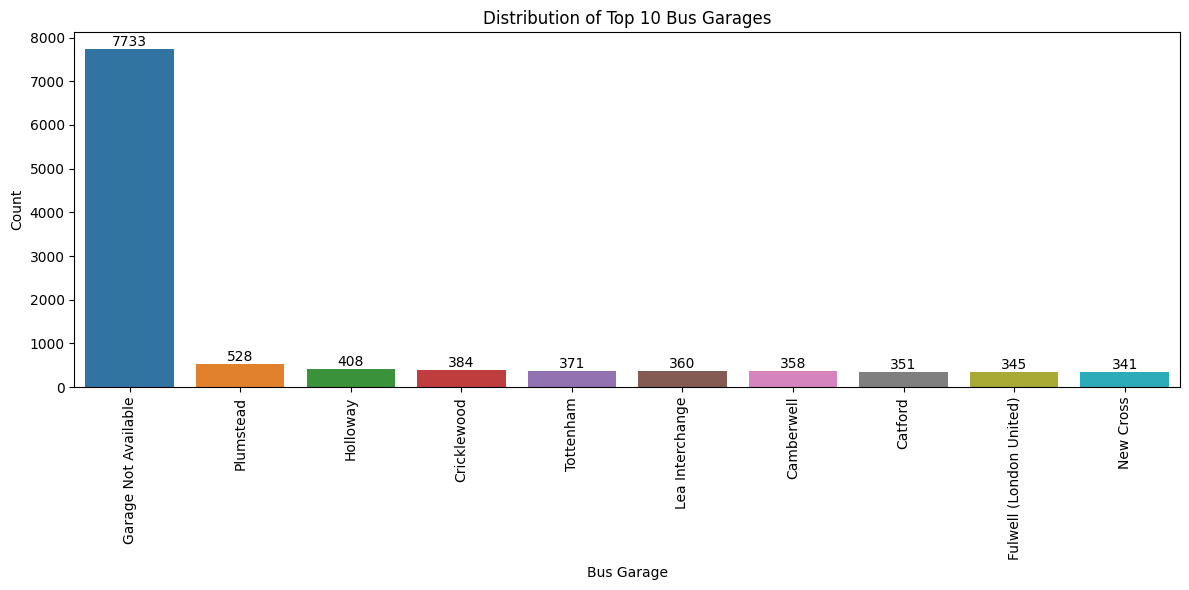

In [ ]:
# Plot the distribution of top 10 bus_garage
plt.figure(figsize=(12, 6))
top_10_garages = df['bus_garage'].value_counts().head(10).index
ax = sns.countplot(data=df[df['bus_garage'].isin(top_10_garages)], x='bus_garage', order=top_10_garages, palette='tab10')
for i in ax.containers:
    ax.bar_label(i,)
plt.title('Distribution of Top 10 Bus Garages')
plt.xlabel('Bus Garage')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


<ipython-input-28-8defd02f6c77>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df[df['borough'].isin(top_10_borough)], x='borough', order=top_10_borough, palette='husl')


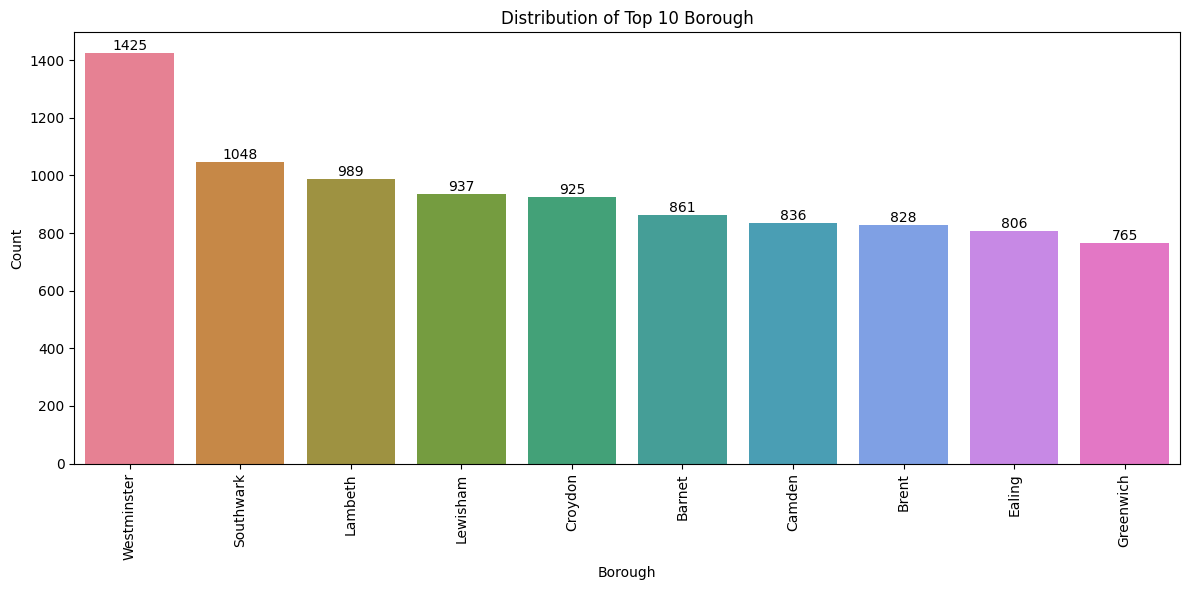

In [ ]:
# Plot the distribution of top 10 borough
plt.figure(figsize=(12, 6))
top_10_borough = df['borough'].value_counts().head(10).index
ax = sns.countplot(data=df[df['borough'].isin(top_10_borough)], x='borough', order=top_10_borough, palette='husl')
for i in ax.containers:
    ax.bar_label(i,)
plt.title('Distribution of Top 10 Borough')
plt.xlabel('Borough')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


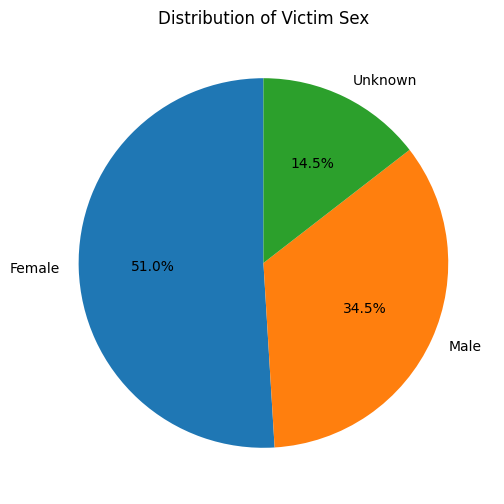

In [ ]:
# Count the occurrences of each victim sex
victim_sex_counts = df['victims_sex'].value_counts()

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(victim_sex_counts, labels=victim_sex_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Victim Sex')
plt.show()


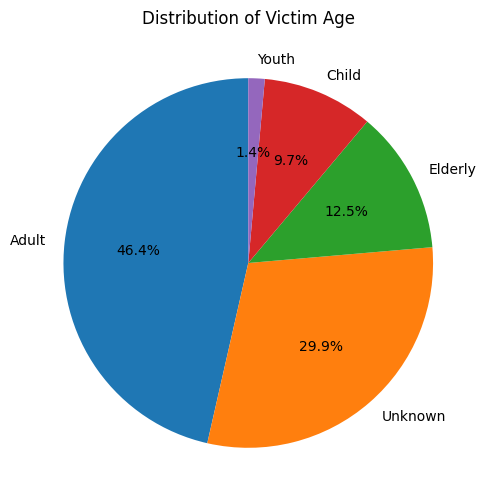

In [ ]:
# Count the occurrences of each victim age
victim_age_counts = df['victims_age'].value_counts()

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(victim_age_counts, labels=victim_age_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Victim Age')
plt.show()


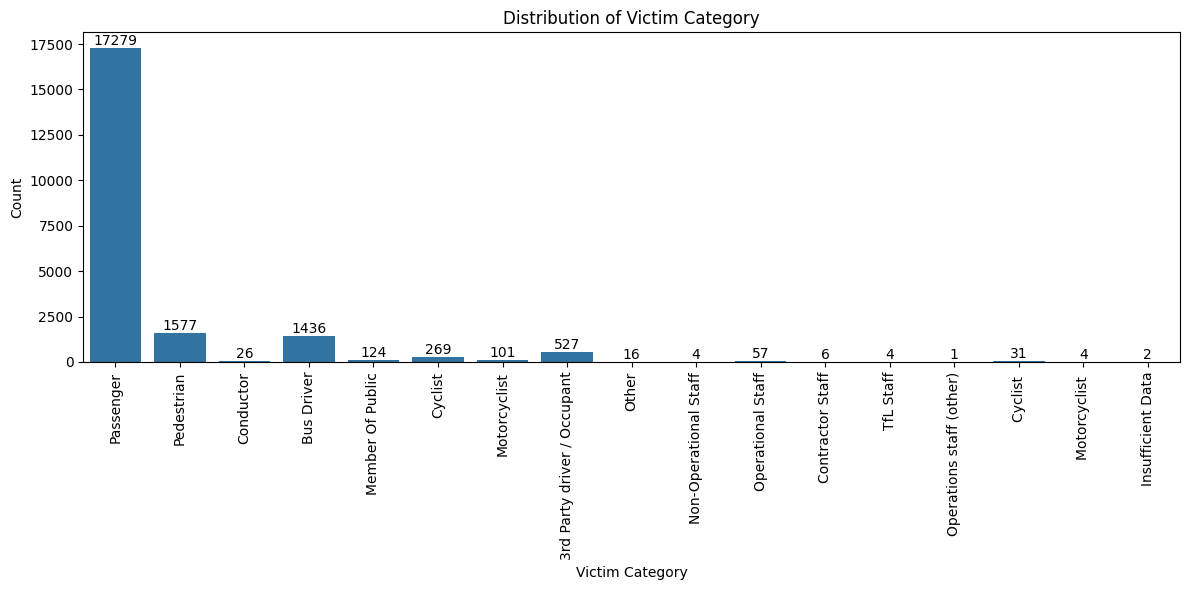

In [ ]:
# Plot the distribution of victim_category
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=df, x='victim_category', order=df['victim_category'].unique())
for i in ax.containers:
    ax.bar_label(i,)
plt.title('Distribution of Victim Category')
plt.xlabel('Victim Category')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [ ]:
# Plot the distribution of incident_event_type
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=df, x='incident_event_type', order=df['incident_event_type'].unique(), palette='tab10')
for i in ax.containers:
    ax.bar_label(i,)
plt.title('Distribution of Incident Event Type')
plt.xlabel('Incident Event Type')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


<ipython-input-32-e7ad50fae91f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='incident_event_type', order=df['incident_event_type'].unique(), palette='tab10')


# **Machine Learning Model**

In [ ]:
# import the packages for machine learning models
import numpy as np
import warnings
warnings.filterwarnings('ignore')
# Packages for models development
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, LSTM
# Packages for Models Evaluation
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
# Convert date_of_incident to datetime
df['date_of_incident'] = pd.to_datetime(df['date_of_incident'])
# Extract features from date_of_incident
df['month'] = df['date_of_incident'].dt.month
df['day_of_week'] = df['date_of_incident'].dt.dayofweek
# Drop date_of_incident as it's no longer needed
df = df.drop(columns=['date_of_incident'])

In [ ]:
# show the variables name
df.columns

Index(['year', 'route', 'operator', 'group_name', 'bus_garage', 'borough',
       'injury_result_description', 'incident_event_type', 'victim_category',
       'victims_sex', 'victims_age', 'month', 'day_of_week'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21464 entries, 0 to 23157
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   year                       21464 non-null  int64 
 1   route                      21464 non-null  object
 2   operator                   21464 non-null  object
 3   group_name                 21464 non-null  object
 4   bus_garage                 21464 non-null  object
 5   borough                    21464 non-null  object
 6   injury_result_description  21464 non-null  object
 7   incident_event_type        21464 non-null  object
 8   victim_category            21464 non-null  object
 9   victims_sex                21464 non-null  object
 10  victims_age                21464 non-null  object
 11  month                      21464 non-null  int32 
 12  day_of_week                21464 non-null  int32 
dtypes: int32(2), int64(1), object(10)
memory usage: 2.1+ MB


### **Label Encoding and Features Extraction**

In [ ]:
#convert object variables into numeric using label encoding method
# Initialize LabelEncoder
label_encoder = LabelEncoder()
# List of categorical columns to encode
categorical_cols = ['route', 'operator', 'group_name', 'bus_garage', 'borough',
                   'injury_result_description', 'incident_event_type',
                   'victim_category', 'victims_sex', 'victims_age']

# Apply label encoding to each categorical column
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

In [ ]:
df.head()

year  route  operator  group_name  bus_garage  borough  \
0  2015      0        12           5          26       29   
1  2015    309        16           7          26       18   
2  2015    381         9           9          26       15   
3  2015    381         9           9          26       25   
4  2015    395        16           7          26       34   

   injury_result_description  incident_event_type  victim_category  \
0                          1                    4               14   
1                          1                    4               14   
2                          3                    4               14   
3                          3                    4               14   
4                          2                    4               15   

   victims_sex  victims_age  month  day_of_week  
0            1            1      1            3  
1            1            3      1            3  
2            1            2      1            3  
3            1            2      1            3  
4            0            2      1            3

In [ ]:
# find feature importance using correlation metrics
# Calculate the correlation matrix
correlation_matrix = df.corr()
# Extract the correlations with the target variable (assuming 'incident_event_type' is the target)
target_correlations = correlation_matrix['incident_event_type'].abs().sort_values(ascending=False)
# Print the feature importance
print(target_correlations)

incident_event_type          1.000000
year                         0.390259
victim_category              0.296238
bus_garage                   0.186692
victims_sex                  0.185497
group_name                   0.070382
month                        0.062935
operator                     0.055638
injury_result_description    0.055490
victims_age                  0.023916
route                        0.022645
day_of_week                  0.014149
borough                      0.004957
Name: incident_event_type, dtype: float64


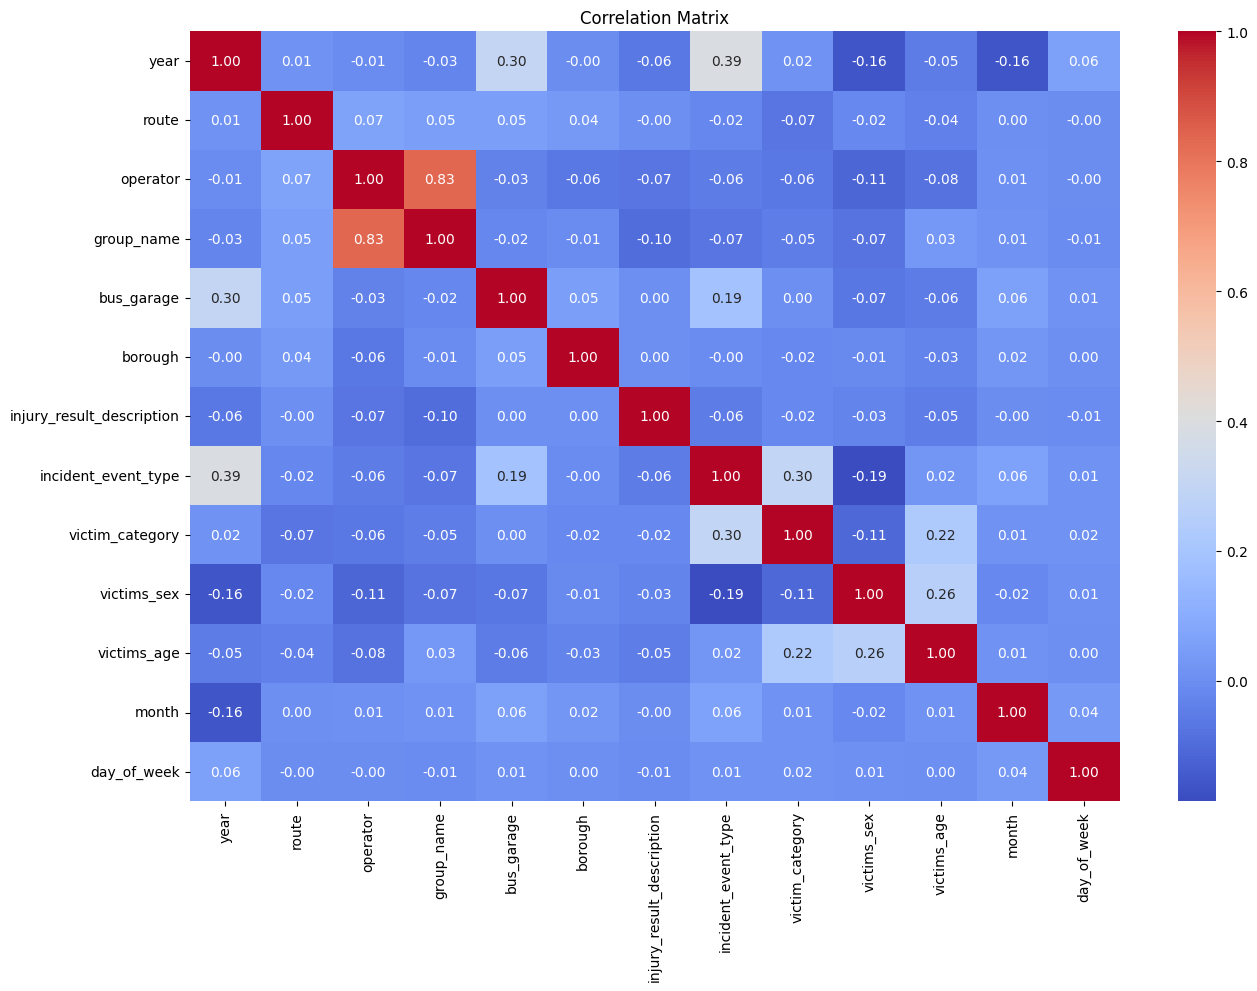

In [ ]:
# Plot the correlation matrix
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


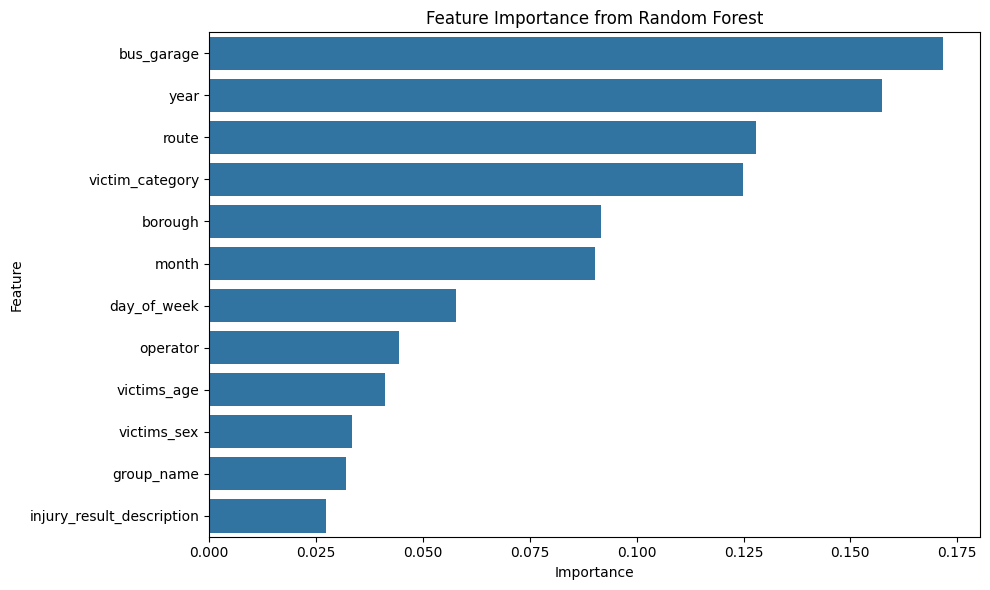

In [ ]:
#find feature importance using random forest classifier and plot the features
# Split the data into features (X) and target variable (y)
X = df.drop('incident_event_type', axis=1)
y = df['incident_event_type']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Random Forest Classifier
rf_classifier = RandomForestClassifier()

# Fit the model
rf_classifier.fit(X_train, y_train)

# Get feature importances
feature_importances = rf_classifier.feature_importances_

# Create a DataFrame for feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance from Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


In [ ]:
# Select top 10 features
top_10_features = feature_importance_df['Feature'][:10].tolist()
# Create a new DataFrame with top 10 features and target feature
top_10_df = df[top_10_features + ['incident_event_type']]
# Display the new DataFrame
top_10_df.head()

bus_garage  year  route  victim_category  borough  month  day_of_week  \
0          26  2015      0               14       29      1            3   
1          26  2015    309               14       18      1            3   
2          26  2015    381               14       15      1            3   
3          26  2015    381               14       25      1            3   
4          26  2015    395               15       34      1            3   

   operator  victims_age  victims_sex  incident_event_type  
0        12            1            1                    4  
1        16            3            1                    4  
2         9            2            1                    4  
3         9            2            1                    4  
4        16            2            0                    4

In [ ]:
# Define features and target
X = top_10_df.drop(columns=['incident_event_type'])
y = top_10_df['incident_event_type']

In [ ]:
# scale X data
from sklearn.preprocessing import StandardScaler
# Initialize StandardScaler
scaler = StandardScaler()
# Fit and transform the features
X_scaled = scaler.fit_transform(X)

In [ ]:
# transform the dataset
from imblearn.over_sampling import SMOTE
from collections import Counter
from matplotlib import pyplot
oversample = SMOTE(k_neighbors=min(5, Counter(y).most_common()[-1][1]-1)) # Set k_neighbors to be at most one less than the smallest class size
X_scaled, y = oversample.fit_resample(X_scaled, y)
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
 per = v / len(y) * 100
 print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

Class=4, n=6558 (10.000%)
Class=2, n=6558 (10.000%)
Class=1, n=6558 (10.000%)
Class=9, n=6558 (10.000%)
Class=7, n=6558 (10.000%)
Class=5, n=6558 (10.000%)
Class=8, n=6558 (10.000%)
Class=0, n=6558 (10.000%)
Class=3, n=6558 (10.000%)
Class=6, n=6558 (10.000%)


In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

## **Develop Regression Models**

### **Logistic Regression**

In [ ]:
from sklearn.metrics import confusion_matrix
# Initialize Logistic Regression model
logistic_model = LogisticRegression(max_iter=100, solver= 'saga', penalty = 'l2', C= 0.1)
# Fit the model to the training data
logistic_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_logistic = logistic_model.predict(X_test)

In [ ]:
# Evaluate the model
print(classification_report(y_test, y_pred_logistic))

# Generate confusion matrix
cm_lg = confusion_matrix(y_test, y_pred_logistic)
print(cm_lg)

              precision    recall  f1-score   support

           0       0.38      0.43      0.41      1978
           1       0.34      0.30      0.32      2016
           2       0.21      0.06      0.10      1925
           3       0.58      0.85      0.69      1991
           4       0.48      0.70      0.57      2010
           5       0.29      0.20      0.24      1940
           6       0.60      1.00      0.75      1914
           7       0.37      0.32      0.35      1972
           8       0.33      0.27      0.30      1934
           9       0.24      0.16      0.20      1994

    accuracy                           0.43     19674
   macro avg       0.38      0.43      0.39     19674
weighted avg       0.38      0.43      0.39     19674

[[ 856   21   27  149    0  254  174   26  308  163]
 [ 193  604   83  322  184  107   37  297   46  143]
 [ 192  195  125  178  413  119  225  207  144  127]
 [   0  290    0 1701    0    0    0    0    0    0]
 [   0   25   59    3 1412   

In [ ]:
# Plot confusion matrix for Logistic Regression
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lg, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


## **Ensemble Learning Models**

### **Random Forest Model**

In [ ]:
# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=200, min_samples_split =2, max_depth = None, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

In [ ]:
# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

In [ ]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

Accuracy: 0.8951407949578123
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1978
           1       0.93      0.96      0.95      2016
           2       0.83      0.75      0.78      1925
           3       1.00      1.00      1.00      1991
           4       0.90      0.93      0.91      2010
           5       0.66      0.61      0.63      1940
           6       1.00      1.00      1.00      1914
           7       0.99      1.00      0.99      1972
           8       0.65      0.72      0.68      1934
           9       0.99      0.99      0.99      1994

    accuracy                           0.90     19674
   macro avg       0.89      0.89      0.89     19674
weighted avg       0.90      0.90      0.89     19674



In [ ]:
# Generate confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
print(cm_rf)

[[1956    1    2    0    0   12    0    0    7    0]
 [   0 1938    9    0   29   19    0    3   17    1]
 [   5   35 1436    1  170  110    0    2  159    7]
 [   0    1    0 1990    0    0    0    0    0    0]
 [   0   26  109    0 1867    0    0    6    0    2]
 [   7   58  122    1    0 1187    0    2  562    1]
 [   0    0    1    0    0    0 1912    0    1    0]
 [   0    0    1    0    6    2    0 1963    0    0]
 [   7   12   52    1    0  471    0    1 1388    2]
 [   0    2    4    0    6    1    0    0    7 1974]]


In [ ]:
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


### **Gradient Boosting Model**

Accuracy: 0.8815695842228322
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      1978
           1       0.89      0.92      0.90      2016
           2       0.84      0.66      0.74      1925
           3       1.00      1.00      1.00      1991
           4       0.88      0.94      0.91      2010
           5       0.63      0.59      0.61      1940
           6       1.00      1.00      1.00      1914
           7       0.99      1.00      0.99      1972
           8       0.64      0.73      0.68      1934
           9       0.99      0.98      0.99      1994

    accuracy                           0.88     19674
   macro avg       0.88      0.88      0.88     19674
weighted avg       0.88      0.88      0.88     19674

[[1946    7    3    0    0   13    0    0    9    0]
 [   1 1859   24    0   41   49    0    7   32    3]
 [  18   78 1264    1  214  153    1    2  184   10]
 [   0    1    0 1990    0   

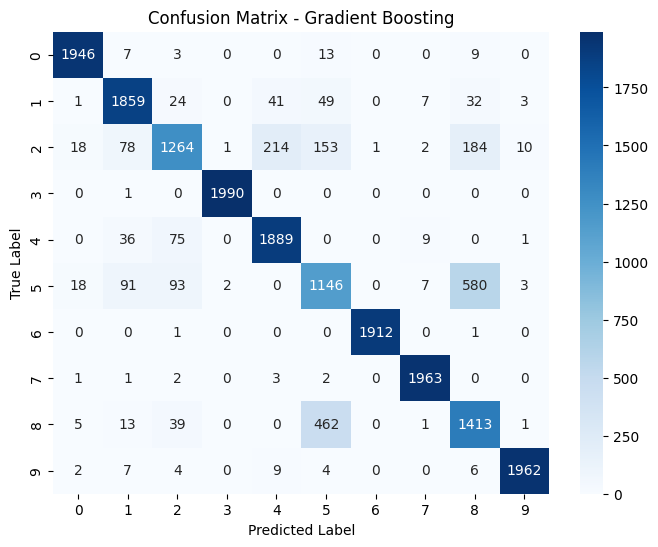

In [ ]:
# Initialize and train the Gradient Boosting model
gb_model = GradientBoostingClassifier(n_estimators=100, max_depth = 7, learning_rate = 0.1, random_state=42)
gb_model.fit(X_train, y_train)

# Predict on the test set
y_pred_gb = gb_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred_gb))
print("Classification Report:\n", classification_report(y_test, y_pred_gb))

# Generate confusion matrix
cm_gb = confusion_matrix(y_test, y_pred_gb)
print(cm_gb)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_gb, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Gradient Boosting')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


## **Decisoin Tree Model**

Accuracy: 0.8448205753786724
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.97      1978
           1       0.85      0.89      0.87      2016
           2       0.65      0.66      0.66      1925
           3       1.00      1.00      1.00      1991
           4       0.87      0.85      0.86      2010
           5       0.54      0.54      0.54      1940
           6       1.00      1.00      1.00      1914
           7       0.97      0.99      0.98      1972
           8       0.60      0.56      0.58      1934
           9       0.98      0.98      0.98      1994

    accuracy                           0.84     19674
   macro avg       0.84      0.84      0.84     19674
weighted avg       0.84      0.84      0.84     19674

[[1927   12    7    0    0   17    0    3   11    1]
 [  11 1796   53    2   40   66    0   14   22   12]
 [  29   93 1269    3  190  164    1   18  140   18]
 [   0    1    0 1988    0   

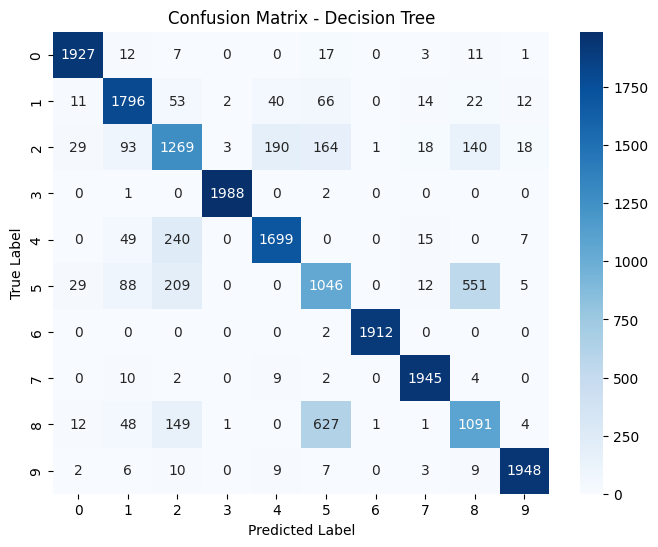

In [ ]:
# Initialize and train the Decision Tree model
dt_model = DecisionTreeClassifier(min_samples_split =2, max_depth = 30, criterion = 'entropy', random_state=42)
dt_model.fit(X_train, y_train)

# Predict on the test set
y_pred_dt = dt_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))

# Generate confusion matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)
print(cm_dt)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Decision Tree')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


## **KNN Model**

Accuracy: 0.872522110399512
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      1978
           1       0.90      0.99      0.94      2016
           2       0.70      0.68      0.69      1925
           3       1.00      1.00      1.00      1991
           4       0.89      0.85      0.87      2010
           5       0.63      0.64      0.63      1940
           6       1.00      1.00      1.00      1914
           7       0.98      1.00      0.99      1972
           8       0.63      0.56      0.59      1934
           9       0.98      1.00      0.99      1994

    accuracy                           0.87     19674
   macro avg       0.87      0.87      0.87     19674
weighted avg       0.87      0.87      0.87     19674

[[1976    0    0    0    0    2    0    0    0    0]
 [   0 1997    8    0    7    3    0    0    1    0]
 [  12   85 1300    2  207  139    0    8  164    8]
 [   0    0    0 1991    0    

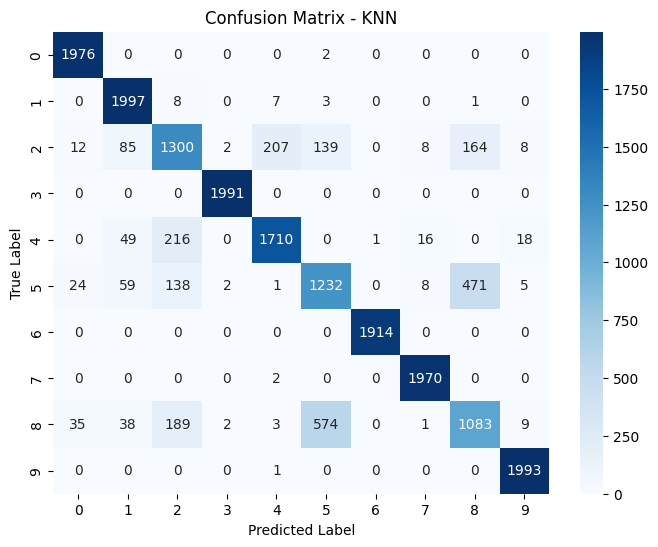

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize and train the KNN model
knn_model = KNeighborsClassifier(n_neighbors=3, weights= 'distance', metric= 'manhattan')
knn_model.fit(X_train, y_train)

# Predict on the test set
y_pred_knn = knn_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))

# Generate confusion matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)
print(cm_knn)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - KNN')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


# **Models Performance Evaluation**

In [ ]:
# Model names and their accuracies
models = ['Logistic Regression', 'Random Forest', 'Gradient Boosting', 'Decision Tree', 'KNN']
accuracies = [accuracy_score(y_test, y_pred_logistic),
              accuracy_score(y_test, y_pred_rf),
              accuracy_score(y_test, y_pred_gb),
              accuracy_score(y_test, y_pred_dt),
              accuracy_score(y_test, y_pred_knn)]

# Create a bar plot using Seaborn
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=models, y=accuracies, palette='tab10')
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Set y-axis limits to be between 0 and 1

# Add data labels to the bars
for i, v in enumerate(accuracies):
    ax.text(i, v + 0.01, f"{v:.2f}", ha='center')

plt.tight_layout()
plt.show()


# **Model Optimization**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
#perform hyperparameter tuning

# Logistic Regression
param_grid_logistic = {
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}
rand_search_logistic = RandomizedSearchCV(LogisticRegression(max_iter=1000), param_grid_logistic, cv=5, scoring='accuracy')
rand_search_logistic.fit(X_train, y_train)
print("Best parameters for Logistic Regression:", rand_search_logistic.best_params_)
print("Best score for Logistic Regression:", rand_search_logistic.best_score_)


Best parameters for Logistic Regression: {'solver': 'saga', 'penalty': 'l2', 'C': 0.1}
Best score for Logistic Regression: 0.4294210119385373


In [ ]:
# Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}
rand_search_rf = RandomizedSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='accuracy')
rand_search_rf.fit(X_train, y_train)
print("Best parameters for Random Forest:", rand_search_rf.best_params_)
print("Best score for Random Forest:", rand_search_rf.best_score_)




Best parameters for Random Forest: {'n_estimators': 200, 'min_samples_split': 2, 'max_depth': None}
Best score for Random Forest: 0.8877924210196966


In [ ]:
# Gradient Boosting
param_grid_gb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1],
    'max_depth': [3, 5, 7]
}
rand_search_gb = RandomizedSearchCV(GradientBoostingClassifier(random_state=42), param_grid_gb, cv=5, scoring='accuracy')
rand_search_gb.fit(X_train, y_train)
print("Best parameters for Gradient Boosting:", rand_search_gb.best_params_)
print("Best score for Gradient Boosting:", rand_search_gb.best_score_)



Best parameters for Gradient Boosting: {'n_estimators': 100, 'max_depth': 7, 'learning_rate': 0.1}
Best score for Gradient Boosting: 0.876159990715059


In [ ]:
# Decision Tree
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}
rand_search_dt = RandomizedSearchCV(DecisionTreeClassifier(random_state=42), param_grid_dt, cv=5, scoring='accuracy')
rand_search_dt.fit(X_train, y_train)
print("Best parameters for Decision Tree:", rand_search_dt.best_params_)
print("Best score for Decision Tree:", rand_search_dt.best_score_)


Best parameters for Decision Tree: {'min_samples_split': 2, 'max_depth': 30, 'criterion': 'entropy'}
Best score for Decision Tree: 0.8344660687904148


In [ ]:
# KNN
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}
rand_search_knn = RandomizedSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5, scoring='accuracy')
rand_search_knn.fit(X_train, y_train)
print("Best parameters for KNN:", rand_search_knn.best_params_)
print("Best score for KNN:", rand_search_knn.best_score_)


Best parameters for KNN: {'weights': 'distance', 'n_neighbors': 3, 'metric': 'manhattan'}
Best score for KNN: 0.8595826127614655
